In [114]:
# Following https://elitedatascience.com/keras-tutorial-deep-learning-in-python
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

from keras.datasets import mnist
%matplotlib inline
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

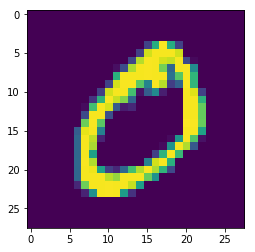

In [115]:
plt.imshow(X_train[1])

[5 0 4 1 9 2 1 3 1 4]


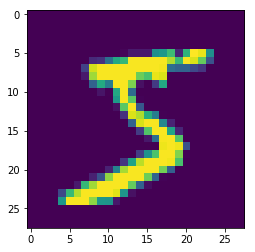

In [116]:
X_train.shape
print(y_train[:10])
plt.imshow(X_train[0])

# Reshaping image data
## Preprocessing image data

In [117]:
# we want to transform our dataset from having shape (n, width, height) to (n, width, height, depth).
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [118]:
X_train.shape

(60000, 28, 28, 1)

In [119]:
# Convert dataset type to float32 and normalize range [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [120]:
y_train.shape

(60000,)

In [121]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [122]:
# Turn y_train and y_test into 10 distinct classes
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [123]:
Y_train.shape

(60000, 10)

# Constructing a model

## 1. CNN input layer

In [124]:
model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1)))
# input_shape=(28, 28, 1) corresponds to width 28 height 28 and depth 1
# first 3 param ->
# 1. Number of convolutional filters
# 2. Number of rows in each convolution kernel

/Users/jasons/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [125]:
model.output_shape

(None, 26, 26, 32)

In [126]:
model.add(Conv2D(32, 3, 3))
# max pooling is a way to reduce number of parameters by sliding in a 2x2 pooling filters
# 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout prevents overfitting
model.add(Dropout(0.25))

/Users/jasons/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


# 2. Fully connected Dense layer

In [127]:
# Final layer has to be flattened to 1 dimensional before passing it down to the FC
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Final layer has output size of 10, which corresponds to number of classes
model.add(Dense(10, activation='softmax'))

# 3. Compile the model

In [128]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 4. Train the model

In [129]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/Users/jasons/anaconda2/lib/python2.7/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.2099 - acc: 0.9352: 0s - loss: 0.2101 - acc: 0.9
Epoch 2/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0925 - acc: 0.9718
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0710 - acc: 0.9784
Epoch 4/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0641 - acc: 0.9804
Epoch 5/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0542 - acc: 0.9833
Epoch 6/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0475 - acc: 0.9852
Epoch 7/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0434 - acc: 0.9865
Epoch 8/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0399 - acc: 0.9874
Epoch 9/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0370 - acc: 0.9881
Epoch 10/10
60000/60000 [==============================] - 94s 2m

# 5. Saving the model to json and its weights

In [132]:
# serialize model to JSON
model_json = model.to_json()
with open("mnist/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mnist/model.h5")
print("Saved model to disk")

Saved model to disk


# 6. Evaluating the model

In [135]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.033437897480218227, 0.99139999999999995]


(28, 28)

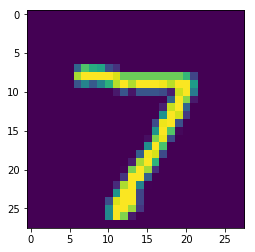

In [150]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_test[0])
X_test[0].shape

In [152]:
model.predict(X_test[0])

ValueError: Error when checking : expected conv2d_12_input to have 4 dimensions, but got array with shape (28, 28)